# Homework 2

This notebook will contain the second homework.

In [1]:
# Dependencies

import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib
import matplotlib.pyplot as plt

from astroquery.sdss import SDSS

# Datashader

import datashader as ds
from datashader.mpl_ext import dsshow

In the first cell I have imported the same dependencies needed from the tutorial.

In [2]:
# Querying 100000 samples

with open('query_homework.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results.to_csv('nlr.csv', sep=',')

/home/damir/.local/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


To query 100000 instead of 30000 I have renamed the `query_task1.txt` and changed the first row of the query from `SELECT TOP 30000` to `SELECT TOP 100000`. </br>
This will give us the same query but a larger sample.

In [3]:
gal = pd.read_csv('nlr.csv', sep=',', index_col=0)
gal.head()

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,h_alpha_eqw,nii_6584_eqw
0,266,51602,1,b'GALAXY',b'',0.021275,462.11760,98.78678,72.29009,205.90460,-5.453050,-2.356328
1,266,51630,1,b'GALAXY',b'STARFORMING',0.021222,472.59040,119.49560,68.39606,224.11360,-5.588495,-2.615378
2,266,51630,4,b'GALAXY',b'STARFORMING',0.064656,99.40005,25.64047,21.44437,51.59155,-5.130115,-2.528958
3,266,51630,6,b'GALAXY',b'STARFORMING',0.052654,127.30580,38.33226,35.46671,25.78963,-21.187690,-3.849116
4,266,51602,12,b'GALAXY',b'STARFORMING',0.065024,211.50180,53.18228,15.59901,76.35482,-14.731980,-5.166841


In [4]:
print(f'The data set contains {gal.shape[0]} records.')

The data set contains 100000 records.


We can see that the query was successful.

[ 1.02930372  2.24077629  6.49635986  7.36340391  8.12791576  7.98158341
  8.74709073 10.22932791  9.4040931   6.31120464  5.75673446  4.55621193
  4.53829369  3.93006876  2.62900496  1.98494354  1.65046961  1.13084045
  1.18857703  0.89292596  0.66197967  0.65202509  0.47284262  0.37926955
  0.31356932  0.2807192   0.17320972  0.16126422  0.13339139  0.1284141 ]


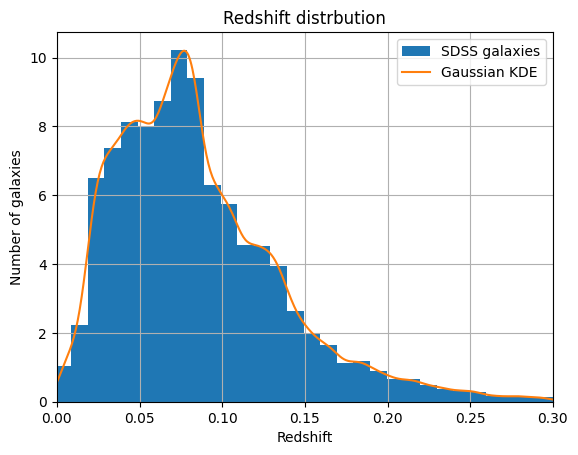

In [5]:
# Redshift distribution with kernel density estimation plot

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, density=True, ax=ax, label="SDSS galaxies")
gal.z.plot.kde(ax=ax, label="Gaussian KDE")
y = np.histogram(gal.z, bins= 30, density=True)
print(y[0])
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(True)
plt.legend()
plt.savefig('z_kde.pdf', dpi=100)

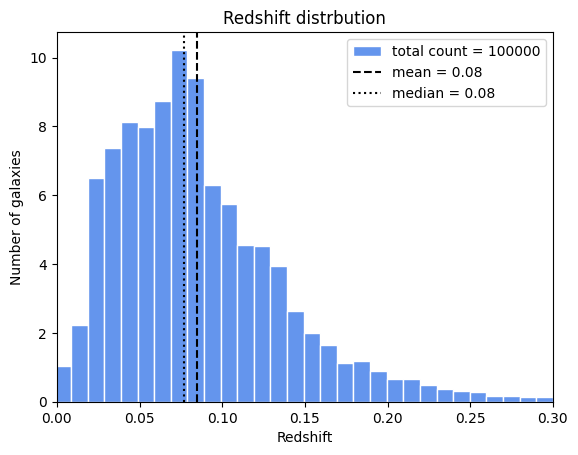

In [6]:
# Redshift distribution with mean and median visualized

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, color='cornflowerblue', edgecolor='white', density=True, ax=ax, label=f"total count = {len(gal)}")
plt.axvline(np.mean(gal.z), linestyle='--', c='k', label=f"mean = {np.mean(gal.z):.2f}")
plt.axvline(np.median(gal.z), linestyle=':', c='k', label=f"median = {np.median(gal.z):.2f}")
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(False)
plt.legend()
plt.savefig('z_dist.pdf', dpi=100)

We can see that both graphs are very much similar compared to the graph from 30000 samples. </br>
Both median and mean are shifted to the right and we can conclude this data is highly skewed to the right. 

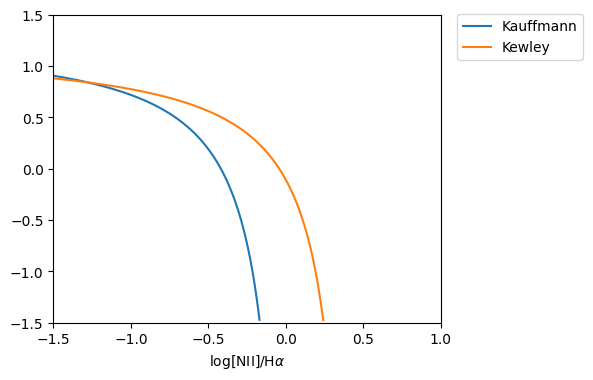

In [7]:
# Let's examine BPT division lines from papers:
# Kewley et al. (2001), ApJ 556, 121 - https://ui.adsabs.harvard.edu/abs/2001ApJ...556..121K/abstract
# Kauffman et al. (2003), MNRAS 346, 1055 - https://ui.adsabs.harvard.edu/abs/2003MNRAS.346.1055K/abstract

x = np.linspace(-1.5, 1.1, 1000)
y_kauffmann = 0.61/(x-0.05) + 1.3 #Kauffman et al. (2003), MNRAS 346, 1055
y_kewley = 0.61/(x-0.47) + 1.19 #Kewley et al. (2001), ApJ 556, 121


# division lines as a function to make it single valued in our limits

def kauffman(x):
    ## x lim was calculated for a y of -1.5
    return [0.61/(i-0.05) + 1.3 if (i < (0.61/(-1.5-1.3))+0.05) else -np.inf for i in x] 

def kewley(x):
   ## x lim was calculated for a y of -1.5 
   return [0.61/(i-0.47) + 1.19 if (i < (0.61/(-1.5-1.19))+0.47) else -np.inf for i in x] 



plt.figure(figsize=(5, 4)) 

fig.suptitle("BPT division lines")

plt.plot(x, kauffman(x), label="Kauffmann")
plt.plot(x, kewley(x), label="Kewley")
plt.xlim(-1.5, 1.0)
plt.ylim(-1.5, 1.5)
plt.xlabel(r"log[NII]/H$\alpha$")
plt.tick_params(direction='out')


plt.legend(bbox_to_anchor=(1.025,1.025), loc='upper left')
fig.tight_layout()
fig.savefig('bpt_division.pdf', dpi=100)

In [8]:
# Let's perfom BPT classification on our sample
# SFG = star-forming galaxy (normal galaxy)
# QSO = quasar (active galaxy, AGN = active galactic nuceli)
# composite = occupying arrea between the empirical (Kauffmann) curves and theortical (Kewly) 

def bpt_classifier(df):
    df['x_BPT'] = np.log10(df['nii_6584_flux']/df['h_alpha_flux'])
    df['y_BPT'] = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])
    df['class_Kauffmann'] = np.where((df['y_BPT'] <= kauffman(df['x_BPT'])), "SFG", "QSO")
    df['class_Kewley'] = np.where((df['y_BPT'] <= kewley(df['x_BPT'])), "SFG", "QSO")
    df['class_BPT'] = np.where(((df['class_Kauffmann']=='SFG')&(df['class_Kewley']=='SFG')), "SFG", 
                                    np.where(((df['class_Kauffmann']=='QSO')&(df['class_Kewley']=='QSO')), "AGN", 
                                            "composite"))
    return df

def bpt_plt(df):

    fig = plt.figure(figsize=(7, 7))

    x = df['x_BPT']
    y = df['y_BPT']
    xy = np.vstack([x,y])
    df["kde"] = gaussian_kde(xy)(xy) #scatter plot colored by density using gaussian_kde

    class_dict = {'SFG': plt.cm.Blues, 
                  'composite': plt.cm.Greens, 
                  'AGN': plt.cm.Oranges
                  }
    
    for class_gal in class_dict.keys():
        df_sub = df[df['class_BPT'] == class_gal]
        x_sub = df_sub['x_BPT']
        y_sub = df_sub['y_BPT']
        z_sub = df_sub['kde']
        normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
        plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                    cmap=class_dict[class_gal], norm=normalize)
    
    x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
    
    plt.plot(x, kauffman(x), 'k--', label="Kauffmann")
    plt.plot(x, kewley(x), 'k:', label="Kewley")

    scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
    scatter2 = plt.scatter([], [], c='green', label="composite")
    scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
    plt.title('BPT diagram')
    plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
              loc='lower left', title="BPT classification", fontsize='medium')
    plt.xlabel(r"log [NII]$\lambda$6584/H$\alpha$", fontsize=12)
    plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
    plt.xlim(-1.5, 0.6)
    plt.ylim(-1.5, 1.5)
    plt.subplots_adjust(hspace=.0)
    
    return fig

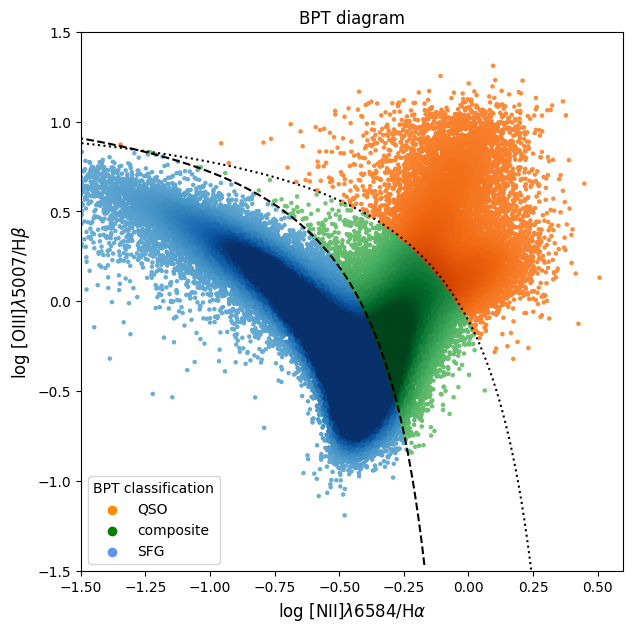

In [9]:
# Plotting the graph using gaussian_kde from scipy.stats

fig = bpt_plt(bpt_classifier(gal))
fig.savefig('bpt_classic.pdf', dpi=100)

Plotting of this figure took quite some time. </br>
Looking through the provided code i concluded the bottleneck comes from `df["kde"] = gaussian_kde(xy)(xy)`. </br>
In the next cell I will modify the code to use `datashader` and hopefully get a faster output and a similar visualization.

In [10]:
# Define datashader dsshow which we will use to plot

def using_datashader(ax, x, y, color=None):

    df = pd.DataFrame(dict(x=x, y=y))
    dsartist = dsshow(
        df,
        ds.Point("x", "y"),
        ds.count(),
        cmap=color,
        norm="log",
        aspect="auto",
        ax=ax
    )

# Crate function to plot with datashader

def bpt_plt_datashader(df, return_fig = False):
    
    fig, ax = plt.subplots(figsize=(7, 7))

    class_dict = {'SFG': plt.cm.Blues, 
                  'composite': plt.cm.Greens, 
                  'AGN': plt.cm.Oranges}
    
    for class_gal in class_dict.keys():
        df_sub = df[df['class_BPT'] == class_gal]
        using_datashader(ax, df_sub['x_BPT'], df_sub['y_BPT'], color=class_dict[class_gal])

    x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
    
    plt.plot(x, kauffman(x), 'k--', label="Kauffmann")
    plt.plot(x, kewley(x), 'k:', label="Kewley")

    scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
    scatter2 = plt.scatter([], [], c='green', label="composite")
    scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
    plt.title('BPT diagram')
    plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
              loc='lower left', title="BPT classification", fontsize='medium')
    plt.xlabel(r"log [NII]$\lambda$6584/H$\alpha$", fontsize=12)
    plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
    plt.xlim(-1.5, 0.6)
    plt.ylim(-1.5, 1.5)

    return fig

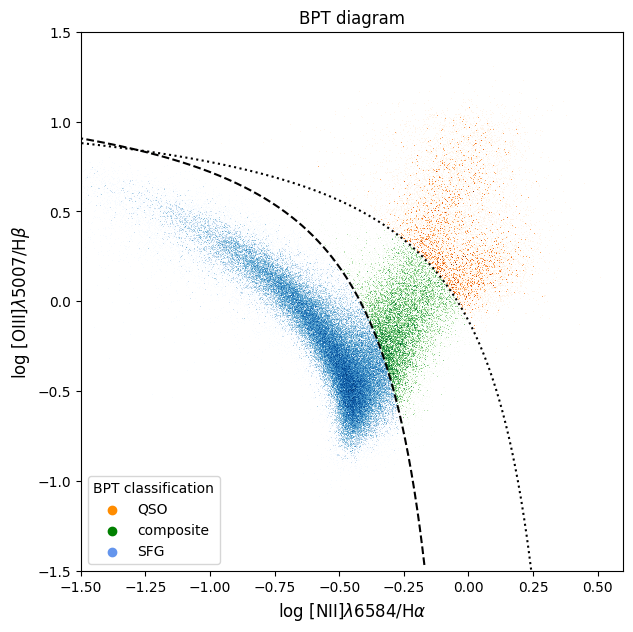

In [11]:
# Displaying the figure

fig = bpt_plt_datashader(bpt_classifier(gal))

We can see a very similar result but with a significantly faster plotting time. This took ~1.4 seconds compared to the previous approach which took >5 minutes.